In [124]:
import pandas as pd
import numpy as np
import datetime
import json
from matplotlib import pyplot as plt
import os
import matplotlib.cm as cm
import matplotlib.colors as colrs
import json
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colrs
from shapely.geometry import shape as Shape
import numpy as np
from descartes.patch import PolygonPatch
import shutil
from shapely.geometry.polygon import Polygon
import geopandas as gpd
from sklearn.cluster import KMeans

In [43]:
city_dims = {
    'Bordeaux': (334, 342),
    'Clermont-Ferrand': (208, 268),
    'Dijon': (195, 234),
    'Grenoble': (409, 251),
    'Lille': (330, 342),
    'Lyon': (426, 287),
    'Mans': (228, 246),
    'Marseille': (211, 210),
    'Metz': (226, 269),
    'Montpellier': (334, 327),
    'Nancy': (151, 165),
    'Nantes': (277, 425),
    'Nice': (150, 214),
    'Orleans': (282, 256),
    'Paris': (409, 346),
    'Rennes': (423, 370),
    'Saint-Etienne': (305, 501),
    'Strasbourg': (296, 258),
    'Toulouse': (280, 347),
    'Tours': (251, 270)
    }

In [44]:
city_str = 'Lyon'
app_str = 'Instagram' 

In [45]:
path =  f'./data/{city_str}/{app_str}/'

In [46]:
days = os.listdir(path)

In [47]:
day = "20190331"

In [48]:
date = datetime.datetime.strptime(day, '%Y%m%d')
times = [date + datetime.timedelta(minutes=15*i) for i in range(96)]
times_str = [t.strftime('%H:%M') for t in times]
columns = ['tile'] + times_str

In [49]:
list_of_days_means = []

# Now i want to group all days in one dataframe

In [50]:
def fillna_with_row_mean(row):
    mean_value = row.mean()
    return row.fillna(mean_value)

In [51]:
#get mean traffic of each day
for day in days:
    df_traffic_day = f'./data/{city_str}/{app_str}/{day}/{city_str}_{app_str}_{day}_DL.txt'
    df_day_means = pd.read_csv(df_traffic_day, sep=' ', names=columns)
    df_day_means.drop('tile',axis= 1, inplace = True)
    
    #check for null values
    if df_day_means.isna().any().any():
        print(df_traffic_day)
        df_day_means = df_day_means.apply(fillna_with_row_mean, axis=1)
        
    df_day_means = df_day_means.mean()
    df_day_means['day'] = day
    list_of_days_means.append(df_day_means)

./data/Lyon/Instagram/20190331/Lyon_Instagram_20190331_DL.txt


In [52]:
df = pd.concat(list_of_days_means, axis=1).transpose()

In [53]:
df.set_index('day',inplace = True)

In [54]:
df

,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,02:00,02:15,...,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
day,,,,,,,,,,,,,,,,,,,,,
20190316,33413.205562,33556.426545,28836.351545,26011.92387,23216.443764,21478.43858,17125.325718,15423.090774,12442.040083,11248.335734,...,49349.20321,51641.791087,49433.882399,51836.084609,51116.542943,51136.939422,52740.236036,50542.113787,51519.999333,42639.22141
20190317,40836.924796,38602.076944,36053.504119,32518.364431,28547.234184,27368.380057,24978.750875,22213.331809,17849.420177,17020.841612,...,53092.952271,54415.162442,52446.915076,51845.891767,53157.866236,50822.266584,48697.869272,45156.557218,38562.94381,28063.041749
20190318,26993.357673,22230.437191,20427.207968,16125.485309,13781.343195,11865.556773,8812.724974,6877.623702,5513.842853,4587.651232,...,56532.319867,54684.593394,53861.273434,54697.594246,53673.101735,49598.753633,45556.440005,43247.800715,36899.481032,27177.0603
20190319,23977.796086,22167.004092,17541.381815,14642.500768,11990.307648,10359.597838,8418.143614,7443.335938,6031.110029,4639.410216,...,55989.783978,55073.832448,52907.72614,53234.343029,51579.182475,51104.251662,47955.540074,44903.21754,37834.283784,28728.136449
20190320,25118.189584,22577.993465,16731.902357,16025.391387,11488.441746,9604.711681,7409.450392,6966.469887,5910.581712,4940.094644,...,52449.812434,54476.675578,54321.886527,53655.771648,53838.37728,47922.311073,45676.582841,42431.851499,38391.121304,30158.854757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20190527,32000.1373,26245.633366,22416.011257,19526.757781,20751.585859,16905.138874,14367.730639,13361.788181,9575.320108,7928.983837,...,49950.342992,55146.778479,54274.403273,56317.355063,54446.187381,51088.9225,47469.642345,45732.395812,42104.987151,31906.980708
20190528,26665.784941,22698.952678,19251.069428,16365.758632,16065.828949,12107.340177,12426.162794,8543.899728,7865.773369,7178.543739,...,47493.740729,50006.678725,52842.769093,53812.291078,51833.805306,50716.663433,50724.091571,43817.053117,40235.013719,31996.749931
20190529,27282.293318,23753.945346,20515.452095,17975.943791,17076.896932,14015.601744,11854.590469,9871.977228,8208.441968,7496.562309,...,41095.699943,47531.412715,49028.63868,48889.629274,48553.074908,49584.660008,45825.252661,45700.671894,41788.301946,37551.827542


# removing outliers

In [55]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)
df_after_rm_outliers = df[~outliers]

In [56]:
df_outliers = df[outliers]

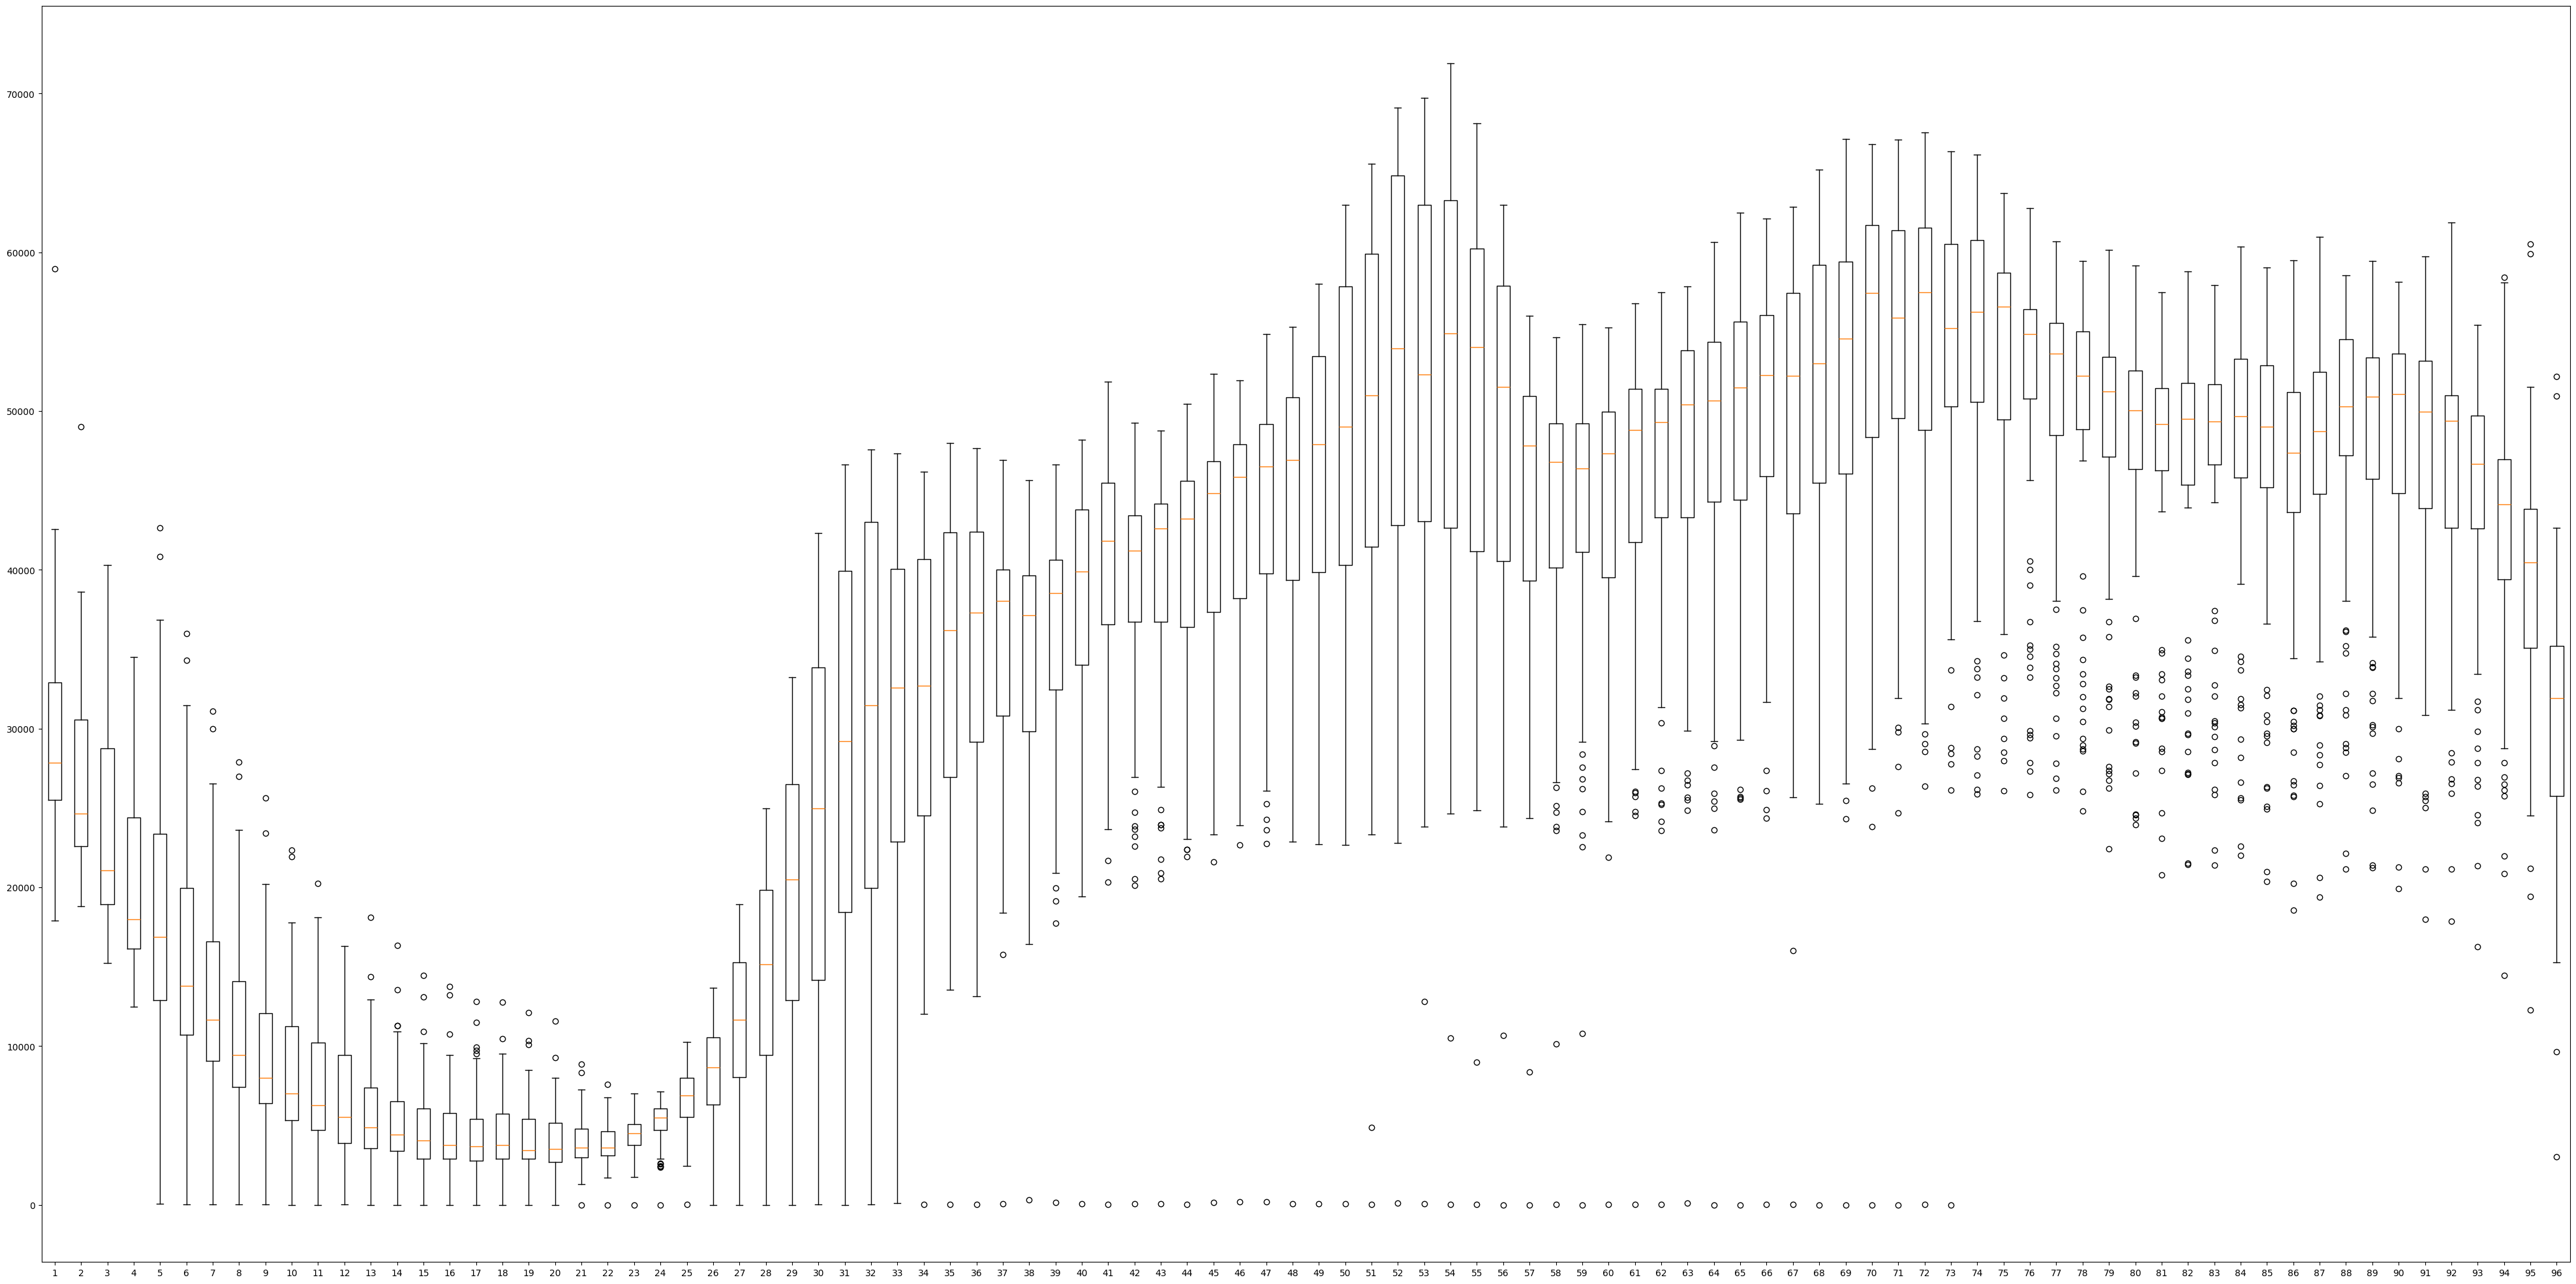

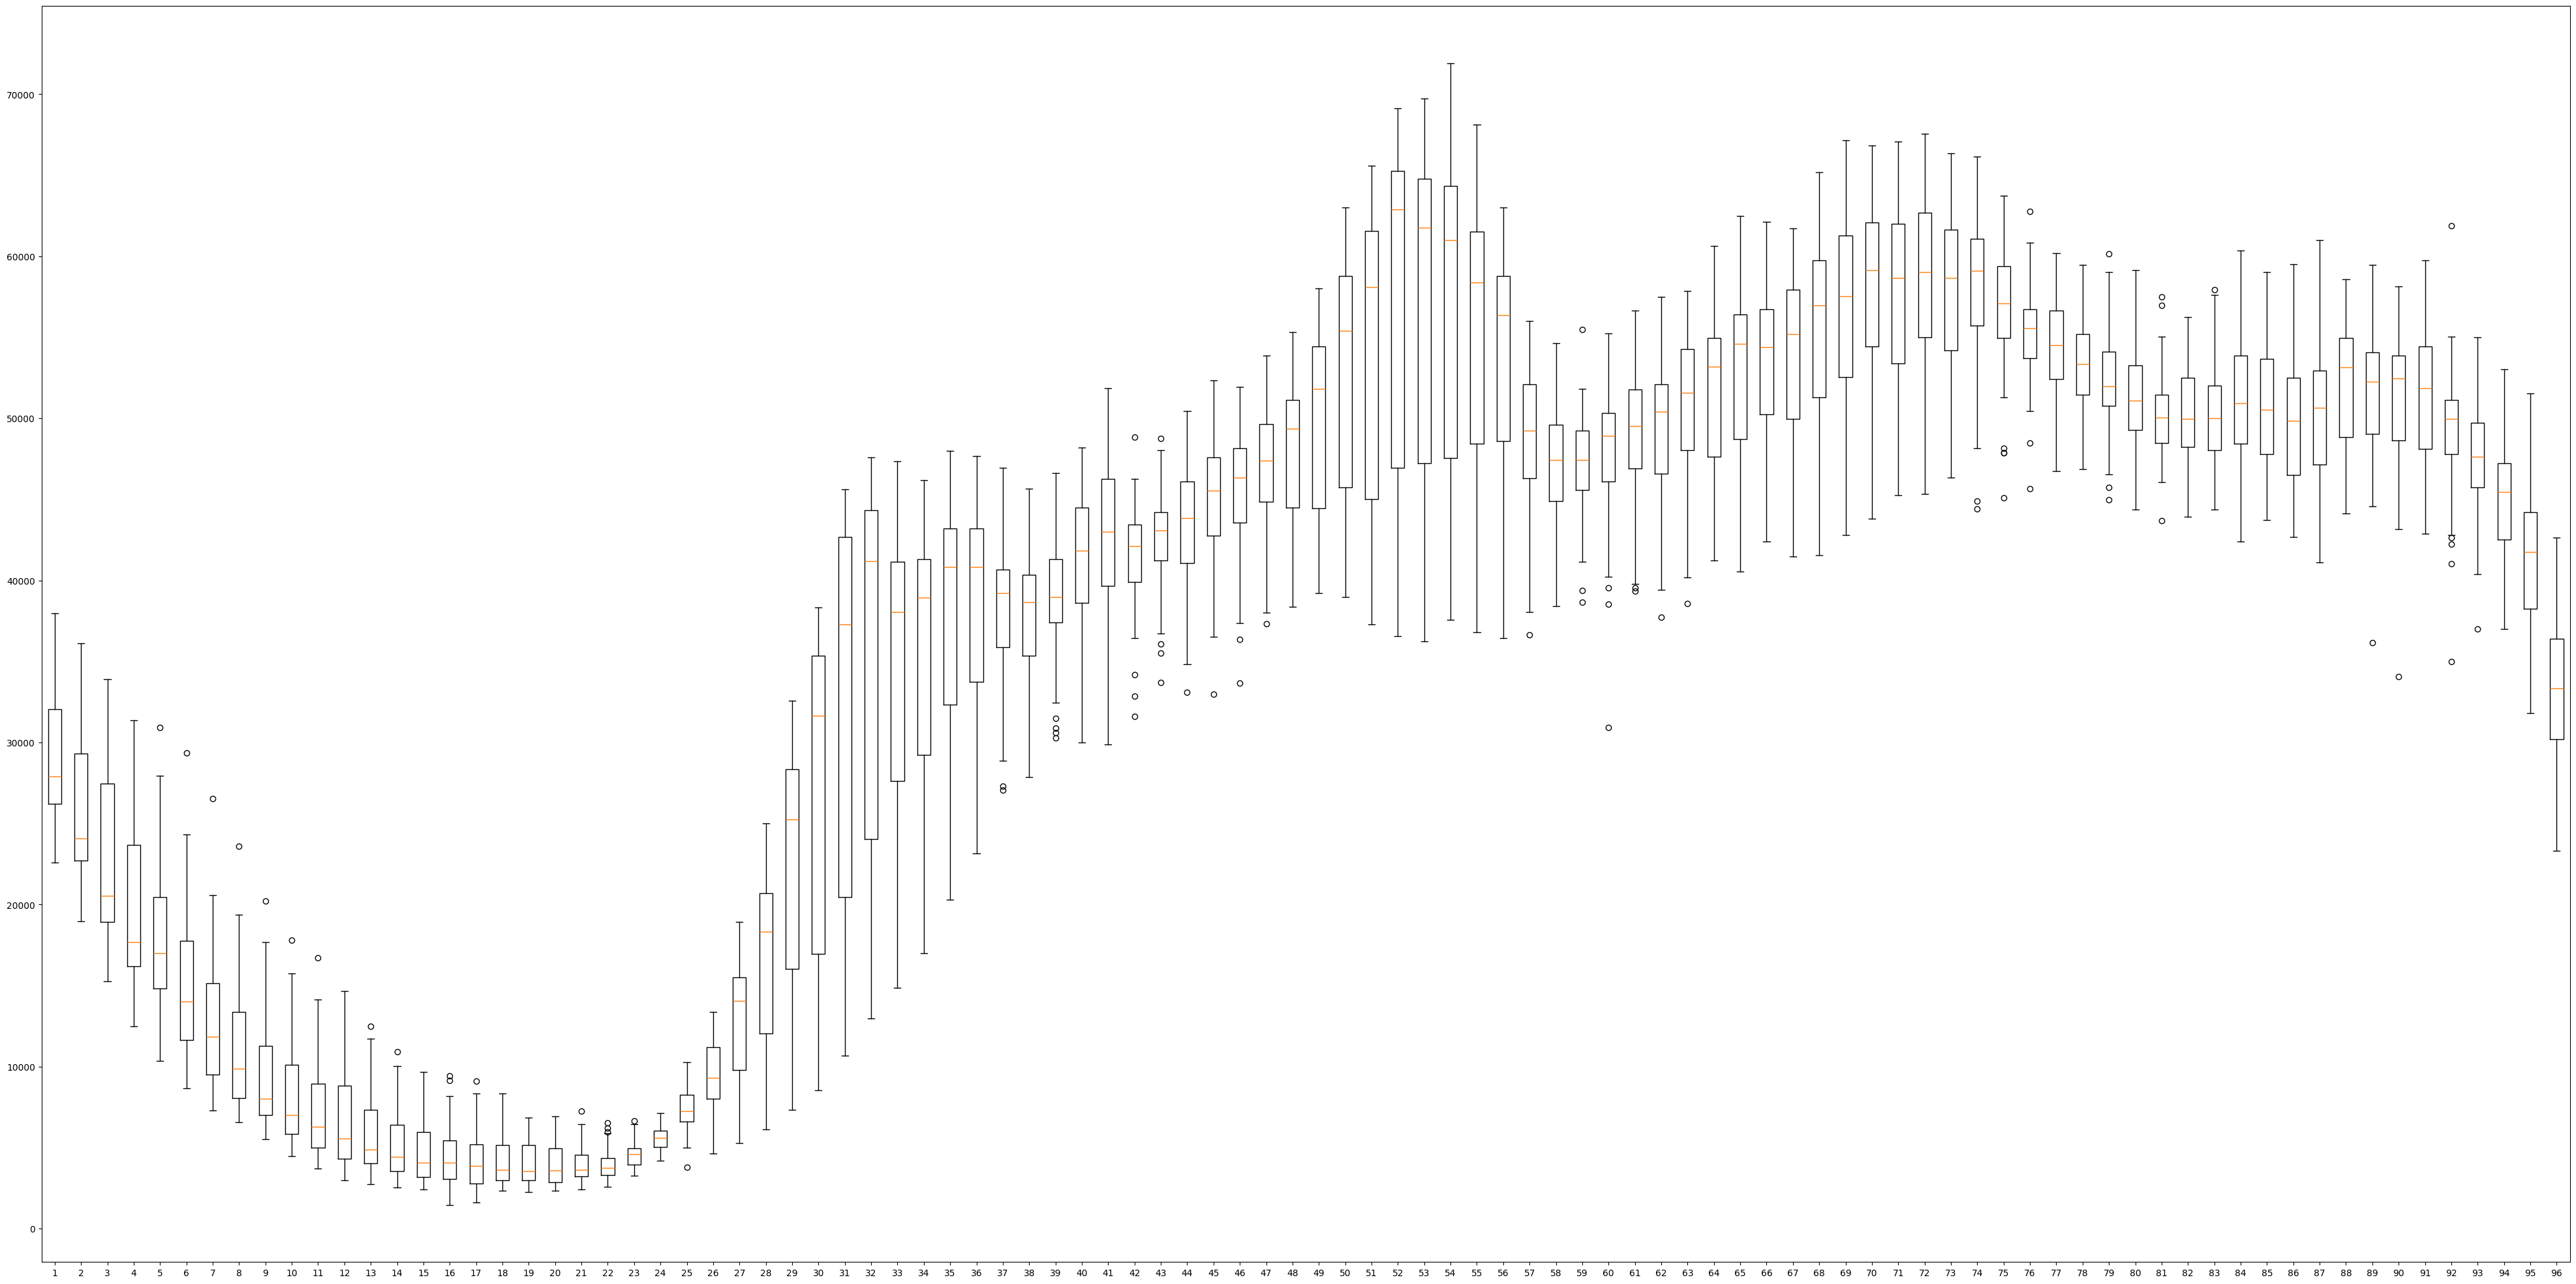

In [58]:
fig1 = plt.figure(figsize =(50, 25))
plt.boxplot(df)
plt.show()

fig2 = plt.figure(figsize =(50, 25))
plt.boxplot(df_after_rm_outliers)
plt.show()

In [67]:
df_after_rm_outliers.reset_index(drop=False, inplace=True)

In [95]:
df_outliers.reset_index(drop=False, inplace=True)

# ------------------------------------------------------------------------------------------

In [78]:
#dictionary to group all days by its name
dictonary_of_days = dict()

In [79]:
for day in df_after_rm_outliers['day'].tolist():
    d = datetime.datetime.strptime(day, '%Y%m%d')
    if d.strftime('%A') in dictonary_of_days:
        dictonary_of_days[d.strftime('%A')].append(day)
    else:
        dictonary_of_days[d.strftime('%A')] = []
        dictonary_of_days[d.strftime('%A')].append(day)

In [ ]:
#create directory for each day_name
for day in dictonary_of_days.keys():
    path = f"./data/{city_str}/{app_str}/"
    os.makedirs(path+day)

In [ ]:
# group the days by its name each one in its directory
for day in dictonary_of_days.keys():
    for d in dictonary_of_days[day]:
            source = f"./data/{city_str}/{app_str}/"
            source += d
            destination = f"./data/{city_str}/{app_str}/"
            destination = destination + day
            shutil.move(source, destination)

In [97]:
os.makedirs(path+"outliers")

In [98]:
for file in df_outliers['day'].tolist():
    source = f"./data/{city_str}/{app_str}/"
    destination = source + "/outliers"
    source += file
    shutil.move(source, destination)

In [99]:
l_out= []

In [100]:
day = datetime.datetime.strptime('20190315', '%Y%m%d')
times = [day + datetime.timedelta(minutes=15*i) for i in range(96)]
times_str = [t.strftime('%H:%M') for t in times]

In [101]:
# here is grouping all of the excel values for each day under its name 
# ex: group all the saturdays in one saturday.csv file storing the av value for each hour
for day_title in dictonary_of_days.keys():
    path = f"./data/{city_str}/{app_str}/" + day_title +"/"
    list_of_d = []
    for curr_day in dictonary_of_days[day_title]:
        curr_path = path + curr_day + "/" + f"{city_str}_{app_str}_{curr_day}_DL"
        columns = ['tile_id'] + times_str
        df = pd.read_csv(curr_path+".txt", sep=' ',names=columns)
        list_of_d.append(df)
    merged_df = pd.concat(list_of_d).groupby('tile_id').mean()
    l_out.append(merged_df)
    merged_df.to_csv(path+day_title+'.csv')

In [102]:
# makeing all dfs without indexes 
for d in l_out:
    d.reset_index(inplace = True);

# Load data of weeks

In [106]:
list_df_days = []

In [109]:
days_names = ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

In [111]:
path_o = './data/Lyon/Instagram/'

In [112]:
for day_name in days_names:
    file_path = path_o + day_name + "/" + day_name + ".csv"
    df = pd.read_csv(file_path)
    list_df_days.append(df)

In [114]:
start_time = pd.Timestamp('00:00:00')
end_time = pd.Timestamp('23:59:59')
time_intervals = pd.date_range(start=start_time, end=end_time, freq='15T')
times_str = [time.strftime('%H:%M') for time in time_intervals]

In [117]:
merged_df_ = pd.concat(list_df_days).groupby('tile_id').mean()
merged_df_.to_csv(path_o+"all_days.csv")

# ------------------------------------------------------------------------------------------

In [120]:
df_places = gpd.read_file('./data/'+'Lyon.geojson')

In [122]:
merged_with_shapes = df_places.merge(merged_df_, on='tile_id')

In [125]:
df_int = merged_with_shapes.select_dtypes(include='int64').dropna()
df_float = merged_with_shapes.select_dtypes(include='float64').dropna()

# Merge the DataFrames
result = pd.merge(left=df_int, right=df_float, left_index=True, right_index=True)
kmeans = KMeans(n_clusters=3, random_state=0).fit(result)
merged_with_shapes['Segmentation'] = kmeans.labels_

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


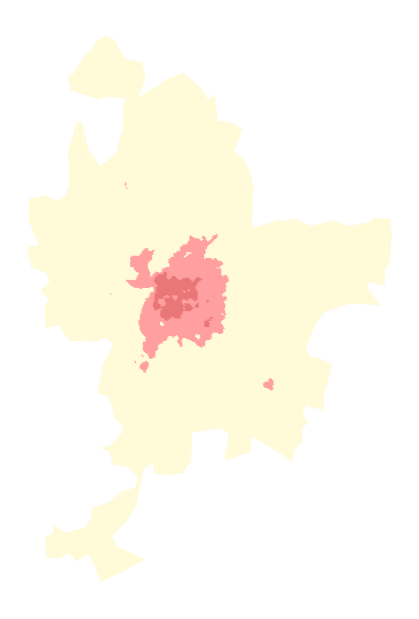

In [132]:
fig = plt.figure(figsize=(4, 6))
ax = fig.add_axes([0, 0, 1, 1])
colors = ['#FFFAD7','#E97777','#FF9F9F']
i = 0

for index, row in merged_with_shapes.iterrows():
    coordinates = row['geometry']
    polygon = Polygon(coordinates)
    ax.fill(*polygon.exterior.xy, color=colors[row['Segmentation']])


plt.autoscale(True)
plt.axis('off')


plt.savefig("C:/Users/user/Desktop/map.png")